# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(merged_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data["Mouse ID"].loc[merged_data["Timepoint"] == 0].duplicated()
duplicates_index = duplicates.loc[duplicates == True].index
merged_data["Mouse ID"].iloc[duplicates_index]

137    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_data.loc[merged_data["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989", :]
clean_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
regimen = clean_data.groupby("Drug Regimen")
regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_variance = regimen["Tumor Volume (mm3)"].var()
regimen_std_dev = regimen["Tumor Volume (mm3)"].std()
regimen_std_err = regimen["Tumor Volume (mm3)"].sem()


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen = clean_data.groupby("Drug Regimen")
regimen_mean = regimen["Tumor Volume (mm3)"].mean()
regimen_median = regimen["Tumor Volume (mm3)"].median()
regimen_variance = regimen["Tumor Volume (mm3)"].var()
regimen_std_dev = regimen["Tumor Volume (mm3)"].std()
regimen_std_err = regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
regimen_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                           "Median Tumor Volume": regimen_median,
                           "Tumor Volume Variance": regimen_variance,
                           "Tumor Volume Std. Dev.": regimen_std_dev,
                           "Tumor Volume Std. Err.": regimen_std_err})
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_aggregation = regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

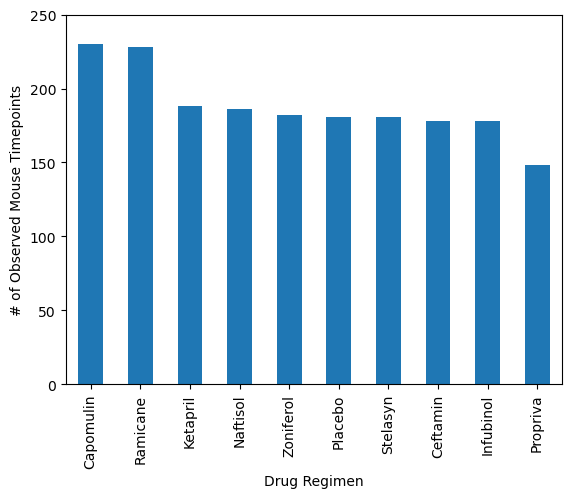

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count = regimen["Timepoint"].count().sort_values(ascending=False)
timepoint_count_plot = timepoint_count.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", ylim=(0, 250))
plt.show()

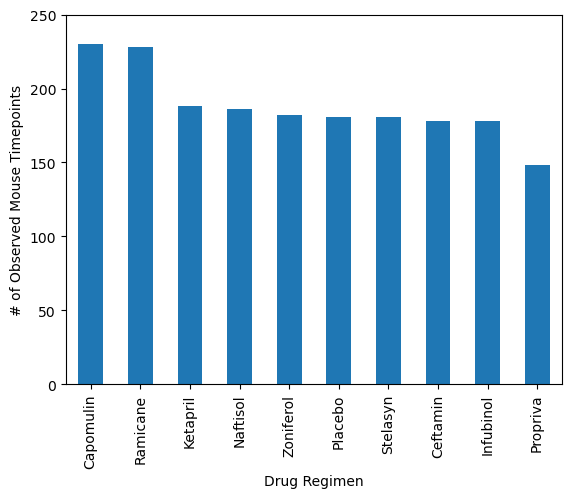

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_count.index, timepoint_count.values, width=.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.ylim(0, 250)
plt.xlim(-0.5, len(timepoint_count.index) - 0.5)
plt.show()

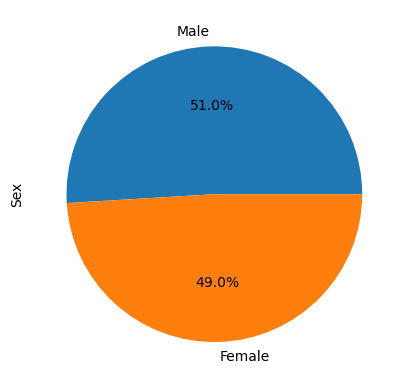

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_data["Sex"].value_counts()
sex_count.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")
plt.show()

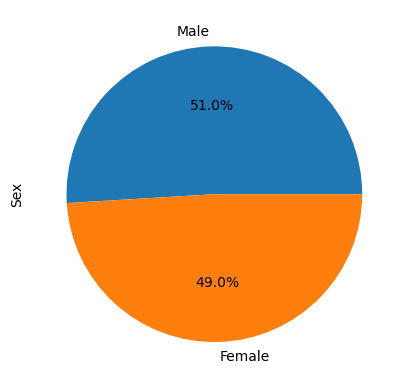

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, autopct="%1.1f%%", labels=sex_count.index)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_drugs = clean_data[clean_data["Drug Regimen"].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin")==True]
four_drugs_group = four_drugs.groupby("Mouse ID")
max_timepoint = four_drugs_group["Timepoint"].max()
four_drugs["Last Timepoint"] = four_drugs["Mouse ID"].map(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = four_drugs.loc[(four_drugs["Last Timepoint"] == four_drugs["Timepoint"]), "Tumor Volume (mm3)"]
four_drugs["Final Tumor Volume"] = four_drugs.index.map(final_tumor_volume)
final_tumor_df = four_drugs.dropna()

C:\Users\Scarthicus\AppData\Local\Temp\ipykernel_14896\1353503303.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_drugs["Last Timepoint"] = four_drugs["Mouse ID"].map(max_timepoint)
C:\Users\Scarthicus\AppData\Local\Temp\ipykernel_14896\1353503303.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_drugs["Final Tumor Volume"] = four_drugs.index.map(final_tumor_volume)


In [18]:
#Cleaning up final_tumor_df
final_tumor_df.sort_values(by="Drug Regimen", ascending=True, inplace=True)
final_tumor_df.reset_index(inplace=True, drop=True)
final_tumor_df

C:\Users\Scarthicus\AppData\Local\Temp\ipykernel_14896\836111915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_tumor_df.sort_values(by="Drug Regimen", ascending=True, inplace=True)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Final Tumor Volume
0,w914,45,36.041047,2,Capomulin,Male,24,21,45,36.041047
1,j246,35,38.753265,1,Capomulin,Female,21,21,35,38.753265
2,t565,45,34.455298,0,Capomulin,Female,20,17,45,34.455298
3,l509,45,41.483008,3,Capomulin,Male,17,21,45,41.483008
4,g288,45,37.074024,1,Capomulin,Male,3,19,45,37.074024
...,...,...,...,...,...,...,...,...,...,...
95,s508,45,30.276232,0,Ramicane,Male,1,17,45,30.276232
96,c458,30,38.342008,2,Ramicane,Female,23,20,30,38.342008
97,z578,45,30.638696,0,Ramicane,Male,11,16,45,30.638696
98,y449,15,44.183451,0,Ramicane,Male,19,24,15,44.183451


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_volumes = final_tumor_df.loc[(final_tumor_df["Drug Regimen"] == drug), "Final Tumor Volume"]
    
    # add subset 
    tumor_volume_list.append(drug_volumes.values)
    
    # Determine outliers using upper and lower bounds
    quantiles = drug_volumes.quantile([0.25, 0.50, 0.75])
    lower_q = quantiles[0.25]
    upper_q = quantiles[0.75]
    iqr = upper_q - lower_q
    upper_bound = upper_q + (1.5 * iqr)
    lower_bound = lower_q - (1.5 * iqr)
    outliers = drug_volumes.loc[(drug_volumes.values > upper_bound) | (drug_volumes.values < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}") 



Capomulin's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)
Infubinol's potential outliers: 58    36.321346
Name: Final Tumor Volume, dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume, dtype: float64)


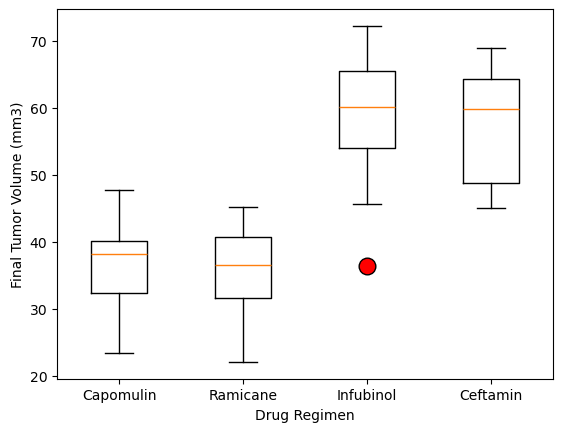

In [75]:
flierprops = dict(markerfacecolor="red", markersize=12)
plt.boxplot(tumor_volume_list, labels=drugs_list, flierprops=flierprops)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

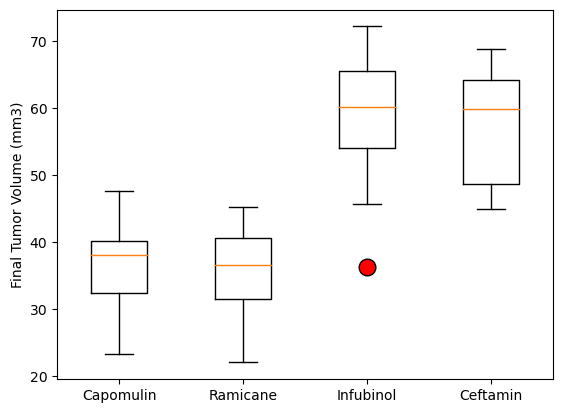

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

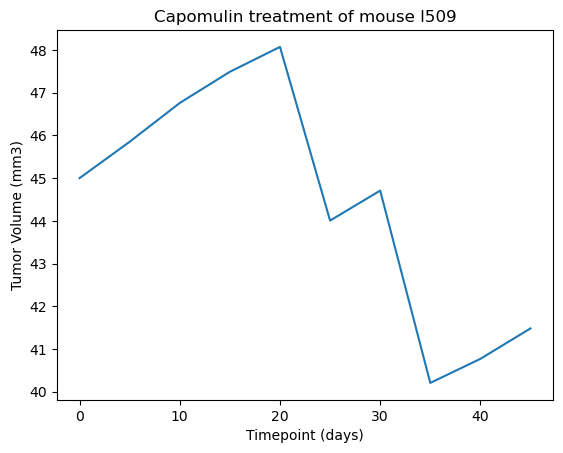

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


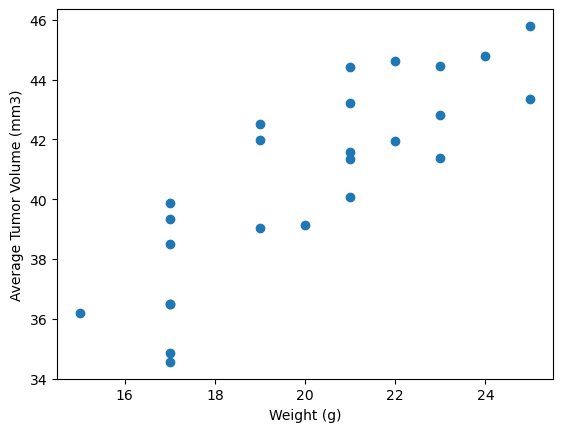

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


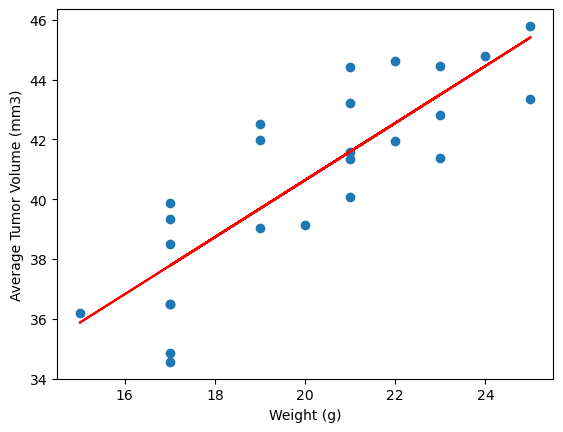

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
